In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow import keras
# from tensorflow.keras import callbacks
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('CensusNonAdjusted.csv')
df = df.T
df.columns = df.loc['NAICS Code']
df = df.drop(index = ['NAICS Code','Business Type'])

for col in df.columns:
    df[col] = df[col].astype(np.float32)


GDP = pd.read_csv("GDP.csv")
GDP = GDP.loc[GDP.index[GDP[GDP['Quarter']=='Q1 1992'].index[0]:]]
# GDP = GDP.index[GDP[GDP['Quarter']=='Q1 1992'].index[0]:]
GDP = GDP.reset_index(drop=True)
GDP['GDPC1'] = GDP['GDPC1'].astype('float32')


In [4]:
def compile_and_checkpoints(model):
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

    checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.keras' 
    checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
    callbacks_list = [checkpoint]

    return model,callbacks_list

In [5]:
def create_model(train,target):
    model = keras.Sequential()

    model.add(keras.layers.Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

    model.add(keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    # model.add(keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    # model.add(keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))


    
    model.add(keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))

    model,callbacks_list = compile_and_checkpoints(model)



    return model,callbacks_list


In [6]:
def train_model(train,target,epochs_const,batch_size_const,validation_split_const):
    model,callbacks_list = create_model(train,target)
    model.fit(train,target, epochs=epochs_const, batch_size=batch_size_const, validation_split = validation_split_const)
    return model

In [7]:
def error(model,test,actual):
    
    predicted = model.predict(test)
    return (np.square(predicted[0]- actual)).mean()

In [8]:
def plot(model,test,actual):
    predicted = model.predict(test)

    print(error(model,test,actual))

    
    plt.scatter(np.arange(0,len(actual)),actual)
    plt.scatter(np.arange(0,len(test)),predicted)

## all vars, no prediction

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 10802.8076 - mean_absolute_error: 10904.7295 - val_loss: 1328.7509 - val_mean_absolute_error: 1328.7509
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3080.2844 - mean_absolute_error: 3083.9265 - val_loss: 2990.5938 - val_mean_absolute_error: 2990.5938
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2191.5298 - mean_absolute_error: 2166.0608 - val_loss: 2806.5325 - val_mean_absolute_error: 2806.5325
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1717.2622 - mean_absolute_error: 1741.9713 - val_loss: 3562.2109 - val_mean_absolute_error: 3562.2109
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 940.1472 - mean_absolute_error: 943.5867 - val_loss: 2542.4114 - val_mean_absolute_error: 2542.4114
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1006.7776 - mean_absolute_error: 1003.6917 - val_loss: 4362.0757 - val_mean_absolute_error: 4362.0757
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

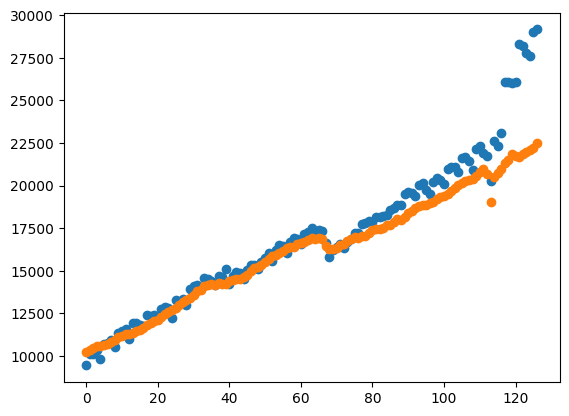

In [23]:
NUM_QUARTERS_PRED = 0

train = df
target = GDP['GDPC1']
test = train
actual = target

model = train_model(train,target,100,16,0.1)

plot(model,test,actual)


# all vars, 2023 prediction

C:\Users\aappe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 13623.0479 - mean_absolute_error: 13994.8467 - val_loss: 10329.0566 - val_mean_absolute_error: 10329.0566
Epoch 2/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3001.8630 - mean_absolute_error: 3016.9226 - val_loss: 2857.7224 - val_mean_absolute_error: 2857.7224
Epoch 3/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1601.6932 - mean_absolute_error: 1632.5770 - val_loss: 1565.6597 - val_mean_absolute_error: 1565.6597
Epoch 4/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2058.8960 - mean_absolute_error: 2035.8196 - val_loss: 5218.9160 - val_mean_absolute_error: 5218.9160
Epoch 5/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1277.6310 - mean_absolute_error: 1291.2106 - val_loss: 3104.7974 - val_mean_absolute_error: 3104.7974
Epoch 6/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 884.5923 - mean_absolute_error: 897.5096 - val_loss: 1543.1057 - val_mean_absolute_error: 1543.1057
Epoch 7/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0

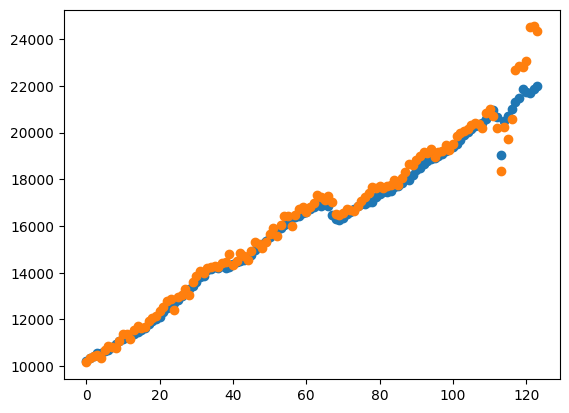

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4607822.5


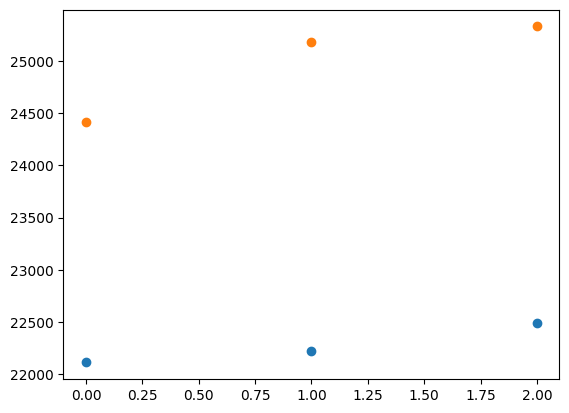

In [9]:
NUM_QUARTERS_PRED = 3

train = df.loc[df.index[:-NUM_QUARTERS_PRED]]
target = GDP['GDPC1'].loc[GDP.index[:-NUM_QUARTERS_PRED]]
test = df.loc[df.index[-NUM_QUARTERS_PRED:]]
actual = GDP['GDPC1'].loc[GDP.index[-NUM_QUARTERS_PRED:]]

model = train_model(train,target,350,32,0.1)

plot(model,train,target)
plt.show()
plot(model,test,actual)


Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 13166.8320 - mean_absolute_error: 13462.1475 - val_loss: 25655.0039 - val_mean_absolute_error: 25655.0039
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8542.7861 - mean_absolute_error: 8695.4902 - val_loss: 3044.2649 - val_mean_absolute_error: 3044.2649
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5383.0947 - mean_absolute_error: 5426.0859 - val_loss: 2204.0073 - val_mean_absolute_error: 2204.0073
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2467.2166 - mean_absolute_error: 2431.9243 - val_loss: 8808.9648 - val_mean_absolute_error: 8808.9648
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1649.5898 - mean_absolute_error: 1625.5529 - val_loss: 3728.0620 - val_mean_absolute_error: 3728.0620
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1592.5142 - mean_absolute_error: 1586.8885 - val_loss: 6210.0112 - val_mean_absolute_error: 6210.0112
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18

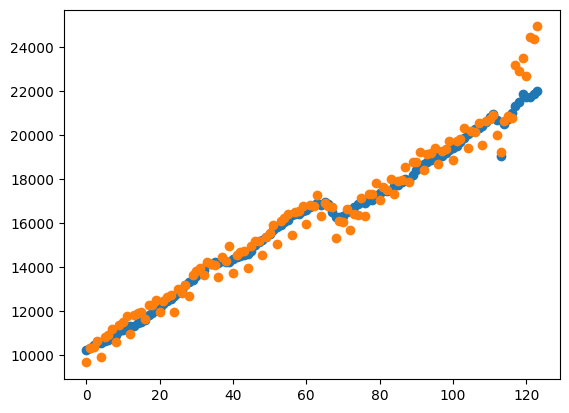

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2709378.0


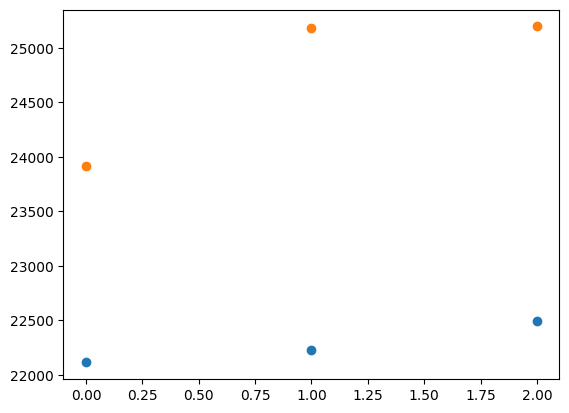

In [14]:
NUM_QUARTERS_PRED = 3

train = df.loc[df.index[:-NUM_QUARTERS_PRED]]
target = GDP['GDPC1'].loc[GDP.index[:-NUM_QUARTERS_PRED]]
test = df.loc[df.index[-NUM_QUARTERS_PRED:]]
actual = GDP['GDPC1'].loc[GDP.index[-NUM_QUARTERS_PRED:]]

model = train_model(train,target,80,32,0.05)

plot(model,train,target)
plt.show()
plot(model,test,actual)


## exclude 2020

In [28]:
df.index

Index(['Q1 1992', 'Q2 1992', 'Q3 1992', 'Q4 1992', 'Q1 1993', 'Q2 1993',
       'Q3 1993', 'Q4 1993', 'Q1 1994', 'Q2 1994',
       ...
       'Q2 2021', 'Q3 2021', 'Q4 2021', 'Q1 2022', 'Q2 2022', 'Q3 2022',
       'Q4 2022', 'Q1 2023', 'Q2 2023', 'Q3 2023'],
      dtype='object', length=127)

In [29]:
df2020= df.drop(index = ['Q2 2020'])
GDP2020 = GDP.drop(index = [113])

## only very predictive variables

In [11]:
df1 = df[['4413', '445', '4451', '446', '44611', '4529', '45291', '722']]
df1.head()

NAICS Code,4413,445,4451,446,44611,4529,45291,722
Q1 1992,9489.0,87841.0,80764.0,21821.0,19062.0,14521.0,8032.0,48376.0
Q2 1992,10834.0,92674.0,84510.0,22406.0,19406.0,16620.0,9348.0,50956.0
Q3 1992,10910.0,94033.0,85599.0,21661.0,18590.0,16586.0,9463.0,51651.0
Q4 1992,10690.0,95965.0,86497.0,23817.0,20733.0,23060.0,13182.0,51882.0
Q1 1993,9937.0,88620.0,81230.0,22029.0,19004.0,15607.0,9023.0,49240.0


C:\Users\aappe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/135
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - loss: 13817.2852 - mean_absolute_error: 14083.0283 - val_loss: 2874.0037 - val_mean_absolute_error: 2874.0037
Epoch 2/135
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5425.2153 - mean_absolute_error: 5609.2725 - val_loss: 1579.7694 - val_mean_absolute_error: 1579.7694
Epoch 3/135
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4121.1909 - mean_absolute_error: 4063.2168 - val_loss: 1935.4186 - val_mean_absolute_error: 1935.4186
Epoch 4/135
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3359.4517 - mean_absolute_error: 3332.8049 - val_loss: 14274.0898 - val_mean_absolute_error: 14274.0898
Epoch 5/135
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3512.8542 - mean_absolute_error: 3552.5142 - val_loss: 1094.5111 - val_mean_absolute_error: 1094.5111
Epoch 6/135
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3265.2803 - mean_absolute_error: 3308.0010 - val_loss: 5906.7656 - val_mean_absolute_error: 5906.7656
Epoch 7/135
4/4 ━━━━━━━━━━━━━━━━━━━

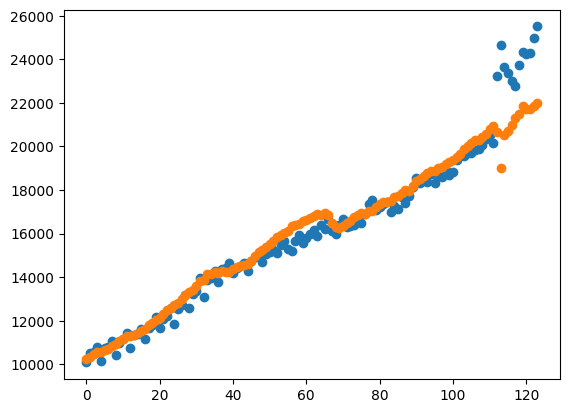

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
7342274.5


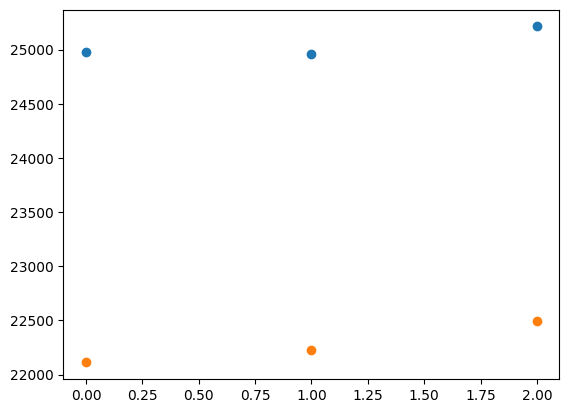

In [12]:
NUM_QUARTERS_PRED = 3

train = df1.loc[df1.index[:-NUM_QUARTERS_PRED]]
target = GDP['GDPC1'].loc[GDP.index[:-NUM_QUARTERS_PRED]]
test = df1.loc[df1.index[-NUM_QUARTERS_PRED:]]
actual = GDP['GDPC1'].loc[GDP.index[-NUM_QUARTERS_PRED:]]

model = train_model(train,target,135,32,0.1)

plot(model,train,target)
plt.show()
plot(model,test,actual)


## only decently predictive variables

In [75]:
df2 = df[['441',
 '4411,4412',
 '4411',
 '44111',
 '44112',
 '443141',
 '4441',
 '44412',
 '44511',
 '4453',
 '447',
 '44819',
 '45111',
 '452',
 '45299',
 '45330',
 '7225',
 '722513, 722514, 722515']]
df2.head()

NAICS Code,441,"4411,4412",4411,44111,44112,443141,4441,44412,44511,4453,447,44819,45111,452,45299,45330,7225,"722513, 722514, 722515"
Q1 1992,96164.0,86675.0,83026.0,77115.0,5911.0,1808.0,23922.0,0.0,0.0,4647.0,35951.0,0.0,3286.0,48995.0,6489.0,1192.0,41145.0,20076.0
Q2 1992,110931.0,100097.0,94476.0,87497.0,6979.0,2051.0,29239.0,0.0,0.0,5272.0,39319.0,0.0,3894.0,57721.0,7272.0,1347.0,43526.0,21997.0
Q3 1992,109133.0,98223.0,93289.0,86935.0,6354.0,2173.0,29536.0,0.0,0.0,5544.0,40839.0,0.0,3923.0,57793.0,7123.0,1498.0,44342.0,22614.0
Q4 1992,102165.0,91475.0,87653.0,82254.0,5399.0,2405.0,27618.0,0.0,0.0,6224.0,40215.0,0.0,4480.0,83367.0,9878.0,1530.0,44455.0,22573.0
Q1 1993,104245.0,94308.0,89990.0,83243.0,6747.0,1903.0,25086.0,0.0,0.0,4821.0,37750.0,0.0,3229.0,51482.0,6584.0,1248.0,42452.0,21650.0


Epoch 1/13


C:\Users\aappe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 12215.5078 - mean_absolute_error: 12245.0576 - val_loss: 23967.2637 - val_mean_absolute_error: 23967.2637
Epoch 2/13
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6481.6074 - mean_absolute_error: 6482.4893 - val_loss: 6557.1538 - val_mean_absolute_error: 6557.1538
Epoch 3/13
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6611.2612 - mean_absolute_error: 6616.8198 - val_loss: 3734.8103 - val_mean_absolute_error: 3734.8103
Epoch 4/13
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3014.5020 - mean_absolute_error: 3016.1514 - val_loss: 5620.5020 - val_mean_absolute_error: 5620.5020
Epoch 5/13
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2005.2617 - mean_absolute_error: 2002.5853 - val_loss: 2523.9636 - val_mean_absolute_error: 2523.9636
Epoch 6/13
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1833.0378 - mean_absolute_error: 1832.1005 - val_loss: 6399.1855 - val_mean_absolute_error: 6399.1855
Epoch 7/13
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

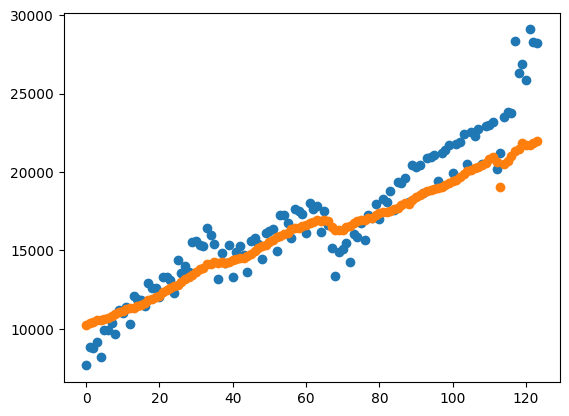

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
18012460.0


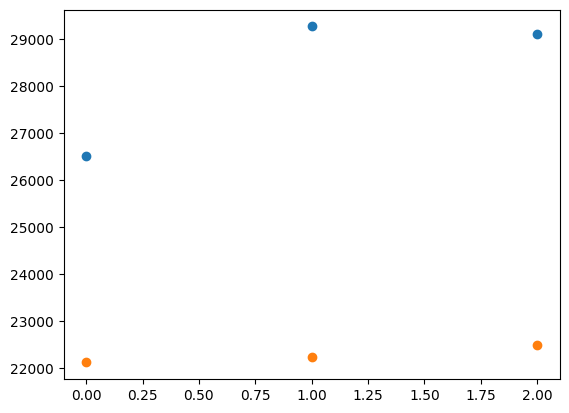

In [76]:
NUM_QUARTERS_PRED = 3

train = df2.loc[df2.index[:-NUM_QUARTERS_PRED]]
target = GDP['GDPC1'].loc[GDP.index[:-NUM_QUARTERS_PRED]]
test = df2.loc[df2.index[-NUM_QUARTERS_PRED:]]
actual = GDP['GDPC1'].loc[GDP.index[-NUM_QUARTERS_PRED:]]

model = train_model(train,target,13,28,0.1)

plot(model,train,target)
plt.show()
plot(model,test,actual)
